In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df = df.drop(['day','month','year'],axis = 1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [11]:
import seaborn as sns

<Axes: >

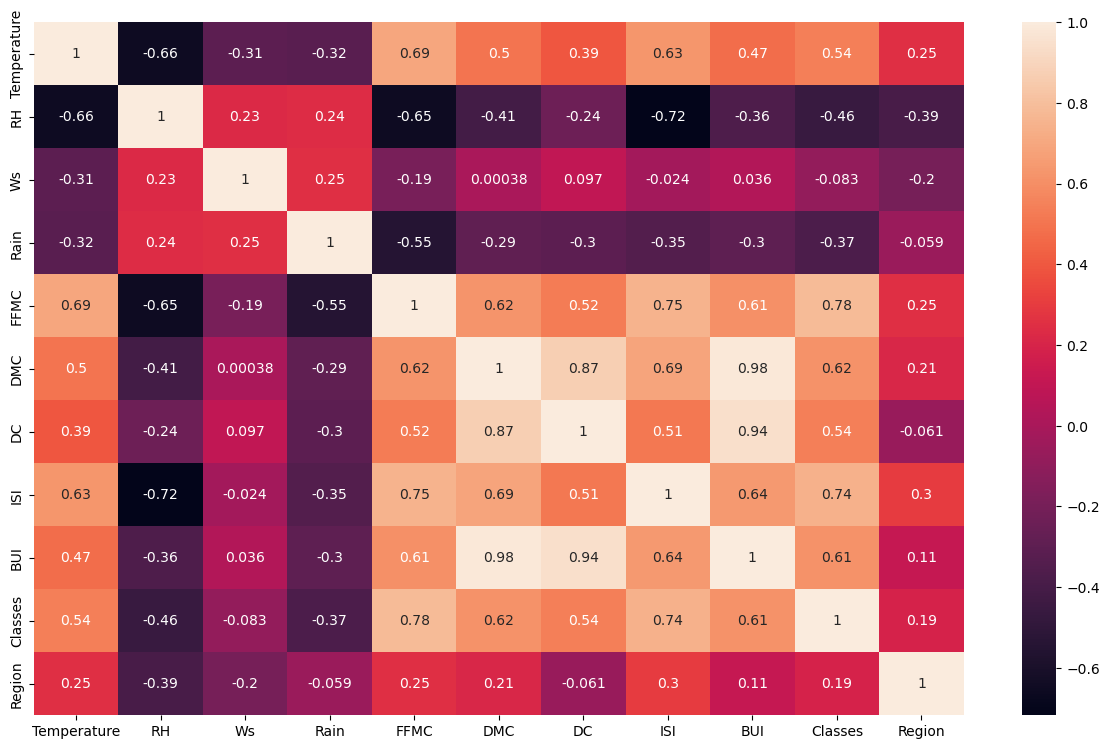

In [12]:
plt.figure(figsize=(15,9))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [13]:
def correlation(dataset,t):
    corrcolumns = set()
    corrmatrix = dataset.corr()
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if abs(corrmatrix.iloc[i,j]) > t:
                corrcolumns.add(corrmatrix.columns[i])
    return corrcolumns
print(correlation(X_train,0.9))

{'BUI'}


In [14]:
corrfeatures = correlation(X_train,0.85)

In [15]:
X_train.drop(corrfeatures,axis=1,inplace=True)
X_test.drop(corrfeatures,axis=1,inplace=True)

In [16]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

<Axes: >

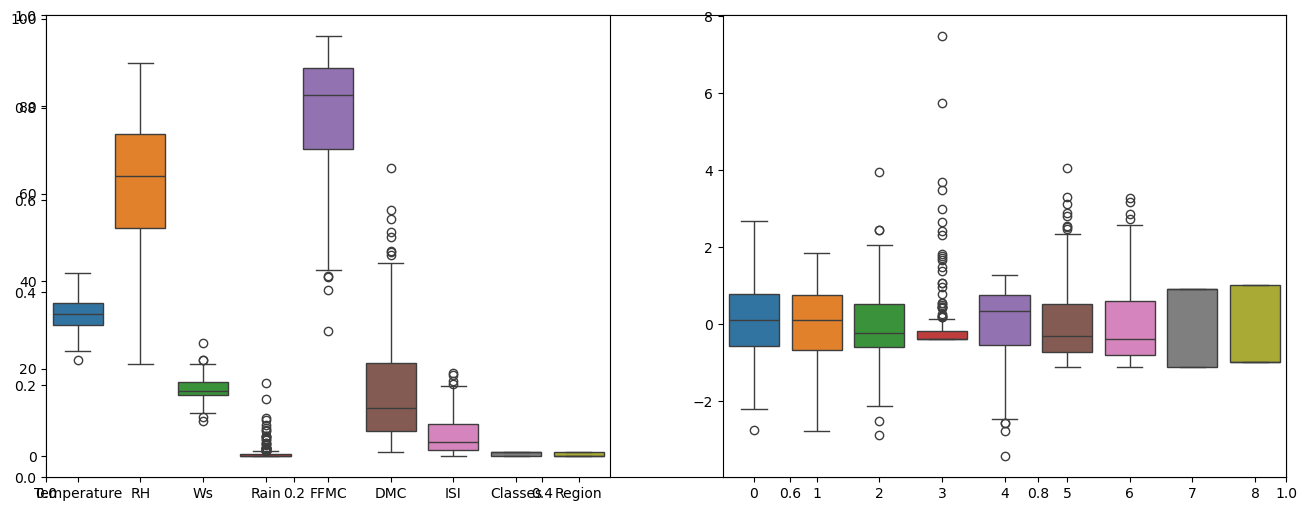

In [20]:
plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_trainscaled)

Mean absolute error 0.5468236465249976
R2 Score 0.9847657384266951


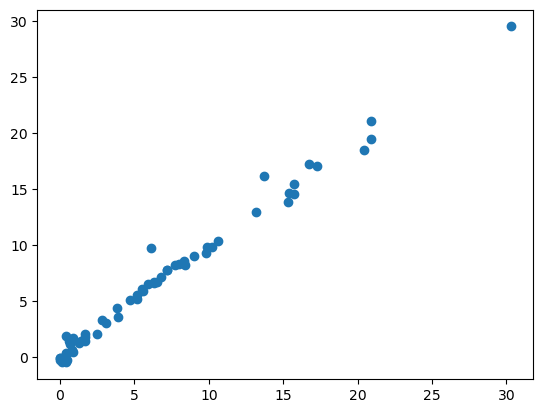

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_trainscaled,y_train)
y_pred=linreg.predict(X_testscaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1331759949144085
R2 Score 0.9492020263112388


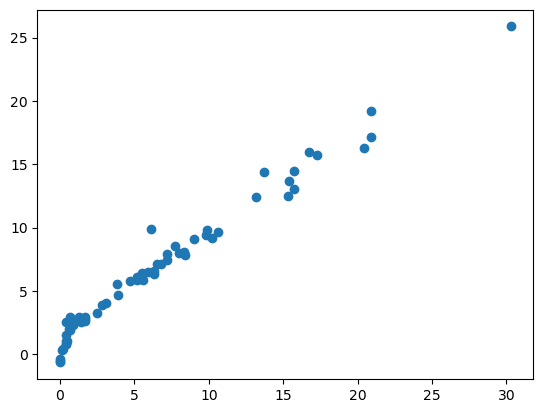

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoreg=Lasso()
lassoreg.fit(X_trainscaled,y_train)
y_pred=lassoreg.predict(X_testscaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5642305340105693
R2 Score 0.9842993364555513


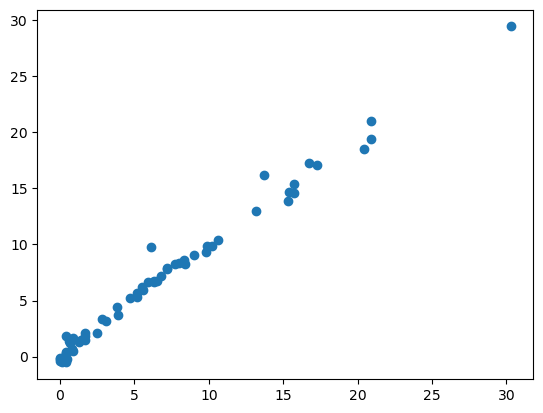

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgereg=Ridge()
ridgereg.fit(X_trainscaled,y_train)
y_pred=ridgereg.predict(X_testscaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [24]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridge.pkl','wb'))